# Prediksi Jenis Wine Berdasarkan Karakteristik Kimia

Anggur adalah salah satu komoditas pertanian bernilai tinggi yang digunakan dalam berbagai industri, terutama dalam pembuatan wine (anggur fermentasi). Beragam jenis anggur memiliki karakteristik unik yang mempengaruhi cita rasa, aroma, dan kualitas produk akhir. Oleh karena itu, pengenalan jenis anggur secara akurat sangat penting, khususnya dalam proses kontrol kualitas dan klasifikasi produk wine.

Salah satu pendekatan untuk mengidentifikasi jenis anggur adalah melalui analisis kimia. Setiap jenis anggur memiliki komposisi kimia yang khas, seperti kadar alkohol, asam malat, fenol, flavonoid, dan mineral. Perbedaan ini dapat diukur secara laboratorium dan digunakan sebagai fitur numerik untuk mengelompokkan atau memprediksi jenis anggur.


## Data Understanding

### Pengumpulan Data

Dataset diambil dari link:

https://archive.ics.uci.edu/dataset/109/wine

Dataset ini berisi hasil analisis kimia dari wine dari tiga varietas berbeda yang ditanam di wilayah yang sama di Italia. Tujuannya ialah untuk mengklasifikasikan wine berdasarkan karakteristik kimianya.

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

## data (as pandas dataframes)
data = wine.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("wine_data.csv", index=True)



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

### Eksplorasi Data


Mengecek data apakah ada data yang outlier dan mengecek apakah ada missing value data.

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset wine
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Tambahkan kolom target (label)
df['target'] = wine_data.target

# 1. CEK MISSING VALUE

print("=== Missing Value per Kolom ===")
print(df.isnull().sum())

# 2. CEK OUTLIER
# Metode: IQR (Interquartile Range)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier untuk setiap kolom numerik
print("\n=== Jumlah Outlier per Kolom (IQR) ===")
for col in df.columns[:-1]:  # kecuali kolom target
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")



=== Missing Value per Kolom ===
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

=== Jumlah Outlier per Kolom (IQR) ===
alcohol: 0 outliers
malic_acid: 3 outliers
ash: 3 outliers
alcalinity_of_ash: 4 outliers
magnesium: 4 outliers
total_phenols: 0 outliers
flavanoids: 0 outliers
nonflavanoid_phenols: 0 outliers
proanthocyanins: 2 outliers
color_intensity: 4 outliers
hue: 1 outliers
od280/od315_of_diluted_wines: 0 outliers
proline: 0 outliers


Dari output diatas bisa ditarik kesimpulan bahwa tidak ada missing value pada dataset. Sebagian besar fitur tidak memiliki outlier, namun outlier pada data belum tentu harus dihapus bisa diselidiki apakah nilai-nilai ini memang mewakili kasus khusus (misalnya anggur yang unik) atau kesalahan data.



### Visualisasi Data

**Visualisasi Dataset Wine**

In [7]:
import pandas as pd
df_wine = pd.concat([X, y], axis=1)
print("Total baris dataset ini adalah =",len(df_wine))
display(data)

Total baris dataset ini adalah = 178


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


**Visualisasi Jumlah Sample Per kelas Wine**

/tmp/ipython-input-8-2160356347.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_wine, palette='viridis')


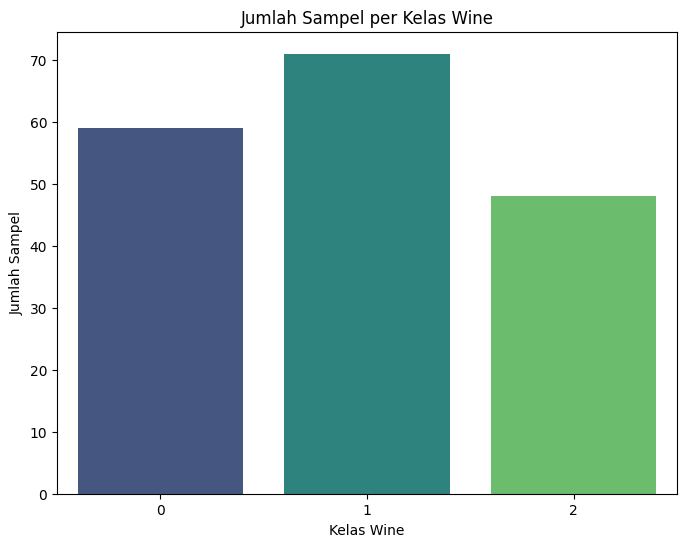

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load dataset wine
wine_data = load_wine()
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

# Visualisasi jumlah sampel per kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_wine, palette='viridis')
plt.title('Jumlah Sampel per Kelas Wine')
plt.xlabel('Kelas Wine')
plt.ylabel('Jumlah Sampel')
plt.show()


**Visualisasi Distribusi Fitur dengan Histogram**

<Figure size 1200x1000 with 0 Axes>

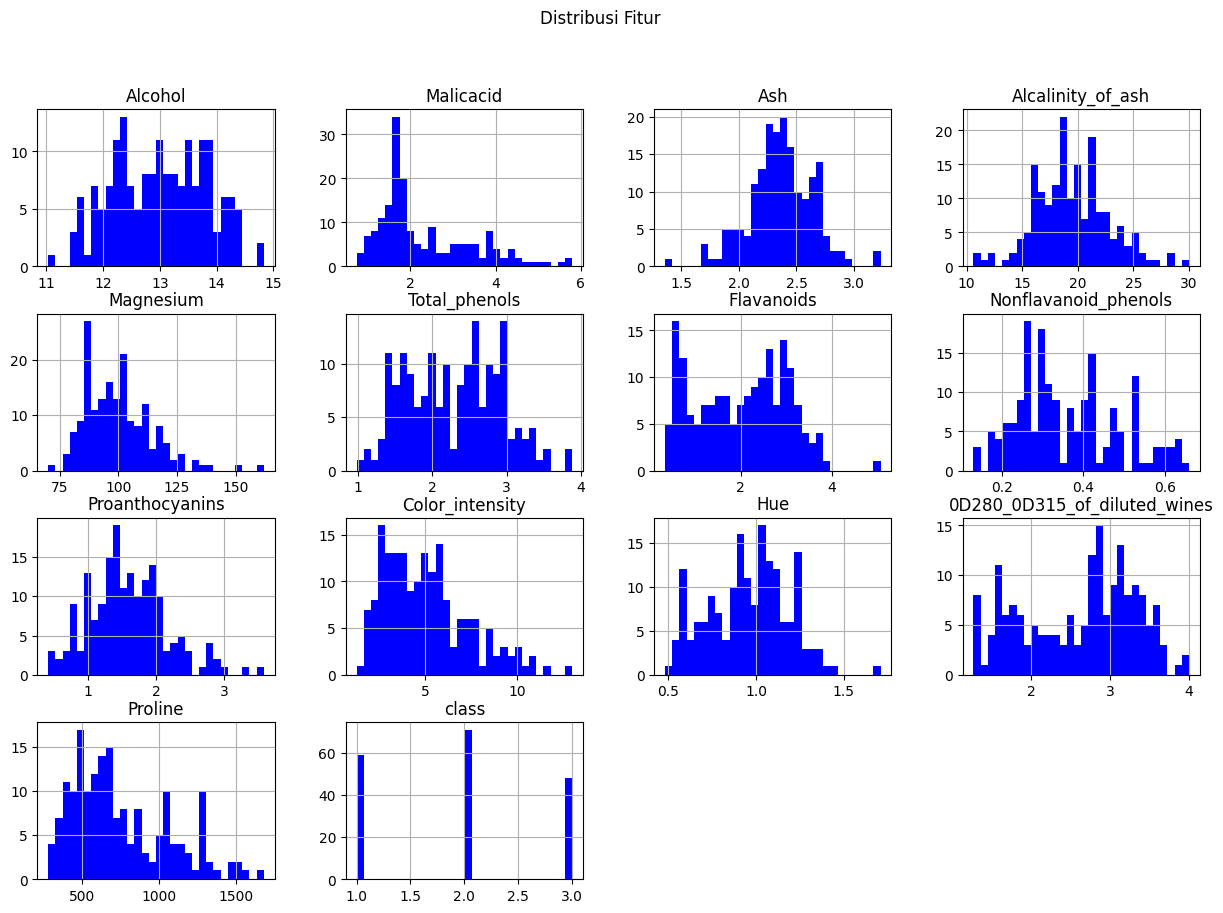

In [9]:
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

**Visualisasi Boxplot untuk Deteksi Outlier**



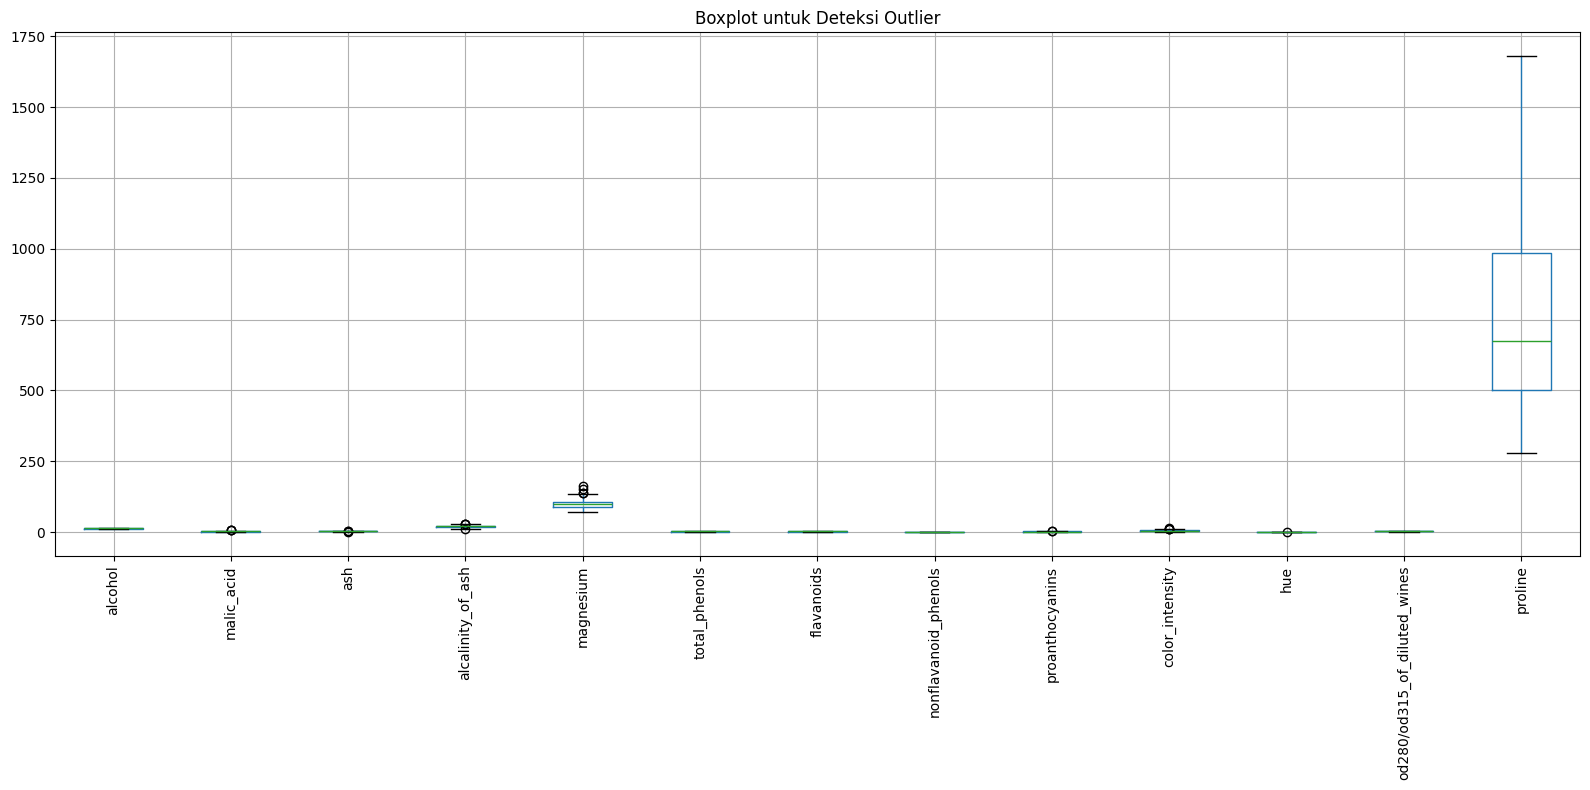

In [10]:
plt.figure(figsize=(16, 8))
df.drop(columns='target').boxplot(rot=90)
plt.title("Boxplot untuk Deteksi Outlier")
plt.tight_layout()
plt.show()

### Penjelasan Fitur dan Variabel

Dataset ini memiliki 13 fitur kimia dari sampel wine (anggur) dan satu target class

#### Variabel Independen

| Nama Fitur                     | Tipe Data |  Kategori | Deskripsi                                                                   |
| ------------------------------ | --------- | ------------- | --------------------------------------------------------------------------- |
| `alcohol`                      | float64   | Numerik       | Persentase kadar alkohol dalam wine                                         |
| `malic_acid`                   | float64   | Numerik       | Kandungan asam malat (rasa asam)                                            |
| `ash`                          | float64   | Numerik       | Kandungan abu (sisa pembakaran bahan organik)                               |
| `alcalinity_of_ash`            | float64   | Numerik       | Tingkat alkalinitas dari abu                                                |
| `magnesium`                    | float64   | Numerik       | Kandungan magnesium (mineral)                                               |
| `total_phenols`                | float64   | Numerik       | Total kandungan senyawa fenol                                               |
| `flavanoids`                   | float64   | Numerik       | Jenis senyawa fenol: flavonoid                                              |
| `nonflavanoid_phenols`         | float64   | Numerik       | Senyawa fenol non-flavonoid                                                 |
| `proanthocyanins`              | float64   | Numerik       | Zat antioksidan dari kelompok tanin                                         |
| `color_intensity`              | float64   | Numerik       | Intensitas warna wine                                                       |
| `hue`                          | float64   | Numerik       | Rona warna (perubahan warna dalam waktu)                                    |
| `od280/od315_of_diluted_wines` | float64   | Numerik       | Rasio penyerapan sinar UV pada dua panjang gelombang (ciri khas kimia wine) |
| `proline`                      | float64   | Numerik       | Kandungan asam amino prolin                                                 |

#### Variabel Dependen (label output)

| Nama     | Tipe Data | Tipe Kategori       | Deskripsi                                                                                                     |
| -------- | --------- | ------------------- | ------------------------------------------------------------------------------------------------------------- |
| `target` | int64     | Kategorikal Nominal | Jenis wine berdasarkan hasil klasifikasi. Nilai: <br>0 = Wine Class 0<br>1 = Wine Class 1<br>2 = Wine Class 2 |



In [11]:
data.shape

(178, 14)

Terdapat 178 baris dan 14 kolom pada dataset wine

## Preprocessing Data

### Transformasi Data

Dataset Wine ini memiliki label kelas (kolom target) yang berupa angka 0, 1, dan 2, yang mewakili tiga jenis wine berbeda. Angka-angka tersebut adalah representasi numerik dari kategori.

Dari label kelas kolom target tersebut disini saya ubah menjadi label kategorikal Class1, Class2, dan Class3 untuk mempermudah interprestasi hasil klasifikasi.



In [12]:
from sklearn.datasets import load_wine

# Ambil dataset
wine_data = load_wine()

# Buat DataFrame
data_before = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Tambahkan label numerik
data_before['target'] = wine_data.target

# Ubah target menjadi label kelas
target_mapping = {0: 'Class1', 1: 'Class2', 2: 'Class3'}
data_before['target'] = data_before['target'].replace(target_mapping)

# Atur agar semua kolom tampil dalam satu baris horizontal
pd.set_option('display.expand_frame_repr', False)

# Tampilkan semua data
# print(data_before)


### Normalisai Data

Normalisasi datase menggunakan StandarScaler

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Kolom Target (Label Kelas Wine)
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])  # Class1, Class2, Class3 → 0, 1, 2

# Pisahkan Fitur dan Label
X = df.drop(columns='target')  # fitur numerik
y = df['target']               # label klasifikasi (kelas wine)

# Scaling (Standarisasi Fitur)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Split Data Training dan Testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,      # fitur yang sudah di-scaling
    y,             # label target (kelas wine: 0, 1, 2)
    test_size=0.2, # 20% untuk data uji
    random_state=42
)


### Visualisasi Data Setelah Preprocessing

In [15]:
df_wine_combined = pd.concat([X, y], axis=1)

print("Total baris dataset ini adalah =", len(df_wine_combined))
print("Visualisasi dataset wine setelah digabung dengan label target:")
print(df_wine_combined.to_string(index=False))

Total baris dataset ini adalah = 178
Visualisasi dataset wine setelah digabung dengan label target:
 alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  od280/od315_of_diluted_wines  proline  target
   14.23        1.71 2.43               15.6      127.0           2.80        3.06                  0.28             2.29         5.640000 1.040                          3.92   1065.0       0
   13.20        1.78 2.14               11.2      100.0           2.65        2.76                  0.26             1.28         4.380000 1.050                          3.40   1050.0       0
   13.16        2.36 2.67               18.6      101.0           2.80        3.24                  0.30             2.81         5.680000 1.030                          3.17   1185.0       0
   14.37        1.95 2.50               16.8      113.0           3.85        3.49                  0.24             2.18         7.

In [16]:
# Simpan ke file CSV
df_wine_combined.to_csv('ddata_wine.csv', index=False)

## Modelling

Modeling adalah proses membangun dan mengembangkan model matematis dan statistik untuk merepresentasikan struktur dan pola dalam suatu kumpulan data. Dalam konteks data mining, modeling digunakan untuk memahami hubungan antar variabel serta membuat prediksi terhadap data baru yang belum terlihat sebelumnya.

Tujuan utama dari modeling adalah menghasilkan model yang akurat sehingga dapat digunakan untuk pengambilan keputusan yang berbasis data, baik dalam bentuk klasifikasi, regresi, clustering, atau jenis analisis lainnya. Proses ini biasanya melibatkan pemilihan algoritma yang sesuai, pelatihan model menggunakan data historis, dan evaluasi performa model.

### Modelling Klasifikasi Menggunakan Decision Tree

Model klasifikasi Decision Tree Classifier merupakan salah satu metode supervised learning yang berbasis aturan dan struktur pohon bercabang. Setiap cabang pada pohon merepresentasikan keputusan berdasarkan nilai fitur, dan setiap daun pada pohon menunjukkan hasil klasifikasi.

**Langkah-langkah modelling:**

1. **Pembagian dataset : data training dan data testing**

  Langkah pertama dalam pemodelan adalah membagi data menjadi dua bagian:

  * Data Latih (Training Set): untuk melatih model.

  * Data Uji (Testing Set): untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya.

  Dalam eksperimen ini, digunakan rasio 80% data latih dan 20% data uji menggunakan fungsi train_test_split.

2. **Pra-pemrosesan data**

  Sebelum data dimasukkan ke dalam model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan:

  * Label target (jenis wine) disandikan sebagai: Class1, Class2, dan Class3.


3. **Pelatihan model**

  Setiap node pohon akan memecah data berdasarkan fitur yang paling mengurangi impurity (diukur dengan Gini Index atau Entropy).

  Pemisahan dilakukan secara rekursif hingga mencapai kedalaman maksimum (max_depth) atau data tidak bisa dipisahkan lebih lanjut.

  Misalnya, dalam model ini digunakan parameter:

  * Kriteria: 'gini' (untuk mengukur kualitas split)

  * Kedalaman maksimum (max_depth): 5 (untuk mencegah overfitting dan menjaga interpretabilitas model)

4. **Evaluasi model**

  Setelah model dilatih, selanjutnya menguji  performa model menggunakan metrik evaluasi berikut:

  * Akurasi: persentase prediksi yang benar terhadap total data uji.

  * Classification Report: meliputi precision, recall, dan F1-score untuk setiap kelas wine.

  * Confusion Matrix: untuk melihat distribusi prediksi model terhadap label aktual.

5. **Prediksi kelas wine**

  Setelah pelatihan dan evaluasi, model dapat digunakan untuk:

  * Memprediksi jenis wine berdasarkan data laboratorium (fitur-fitur kimia).

  * Mengidentifikasi fitur-fitur mana yang paling berpengaruh dalam membedakan jenis wine (misalnya flavanoids, color_intensity, atau alcohol).

7. **Visualisasi Pohon**

Akurasi: 0.9444444444444444

=== Classification Report ===
              precision    recall  f1-score   support

      Class1       0.93      0.93      0.93        14
      Class2       0.93      1.00      0.97        14
      Class3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



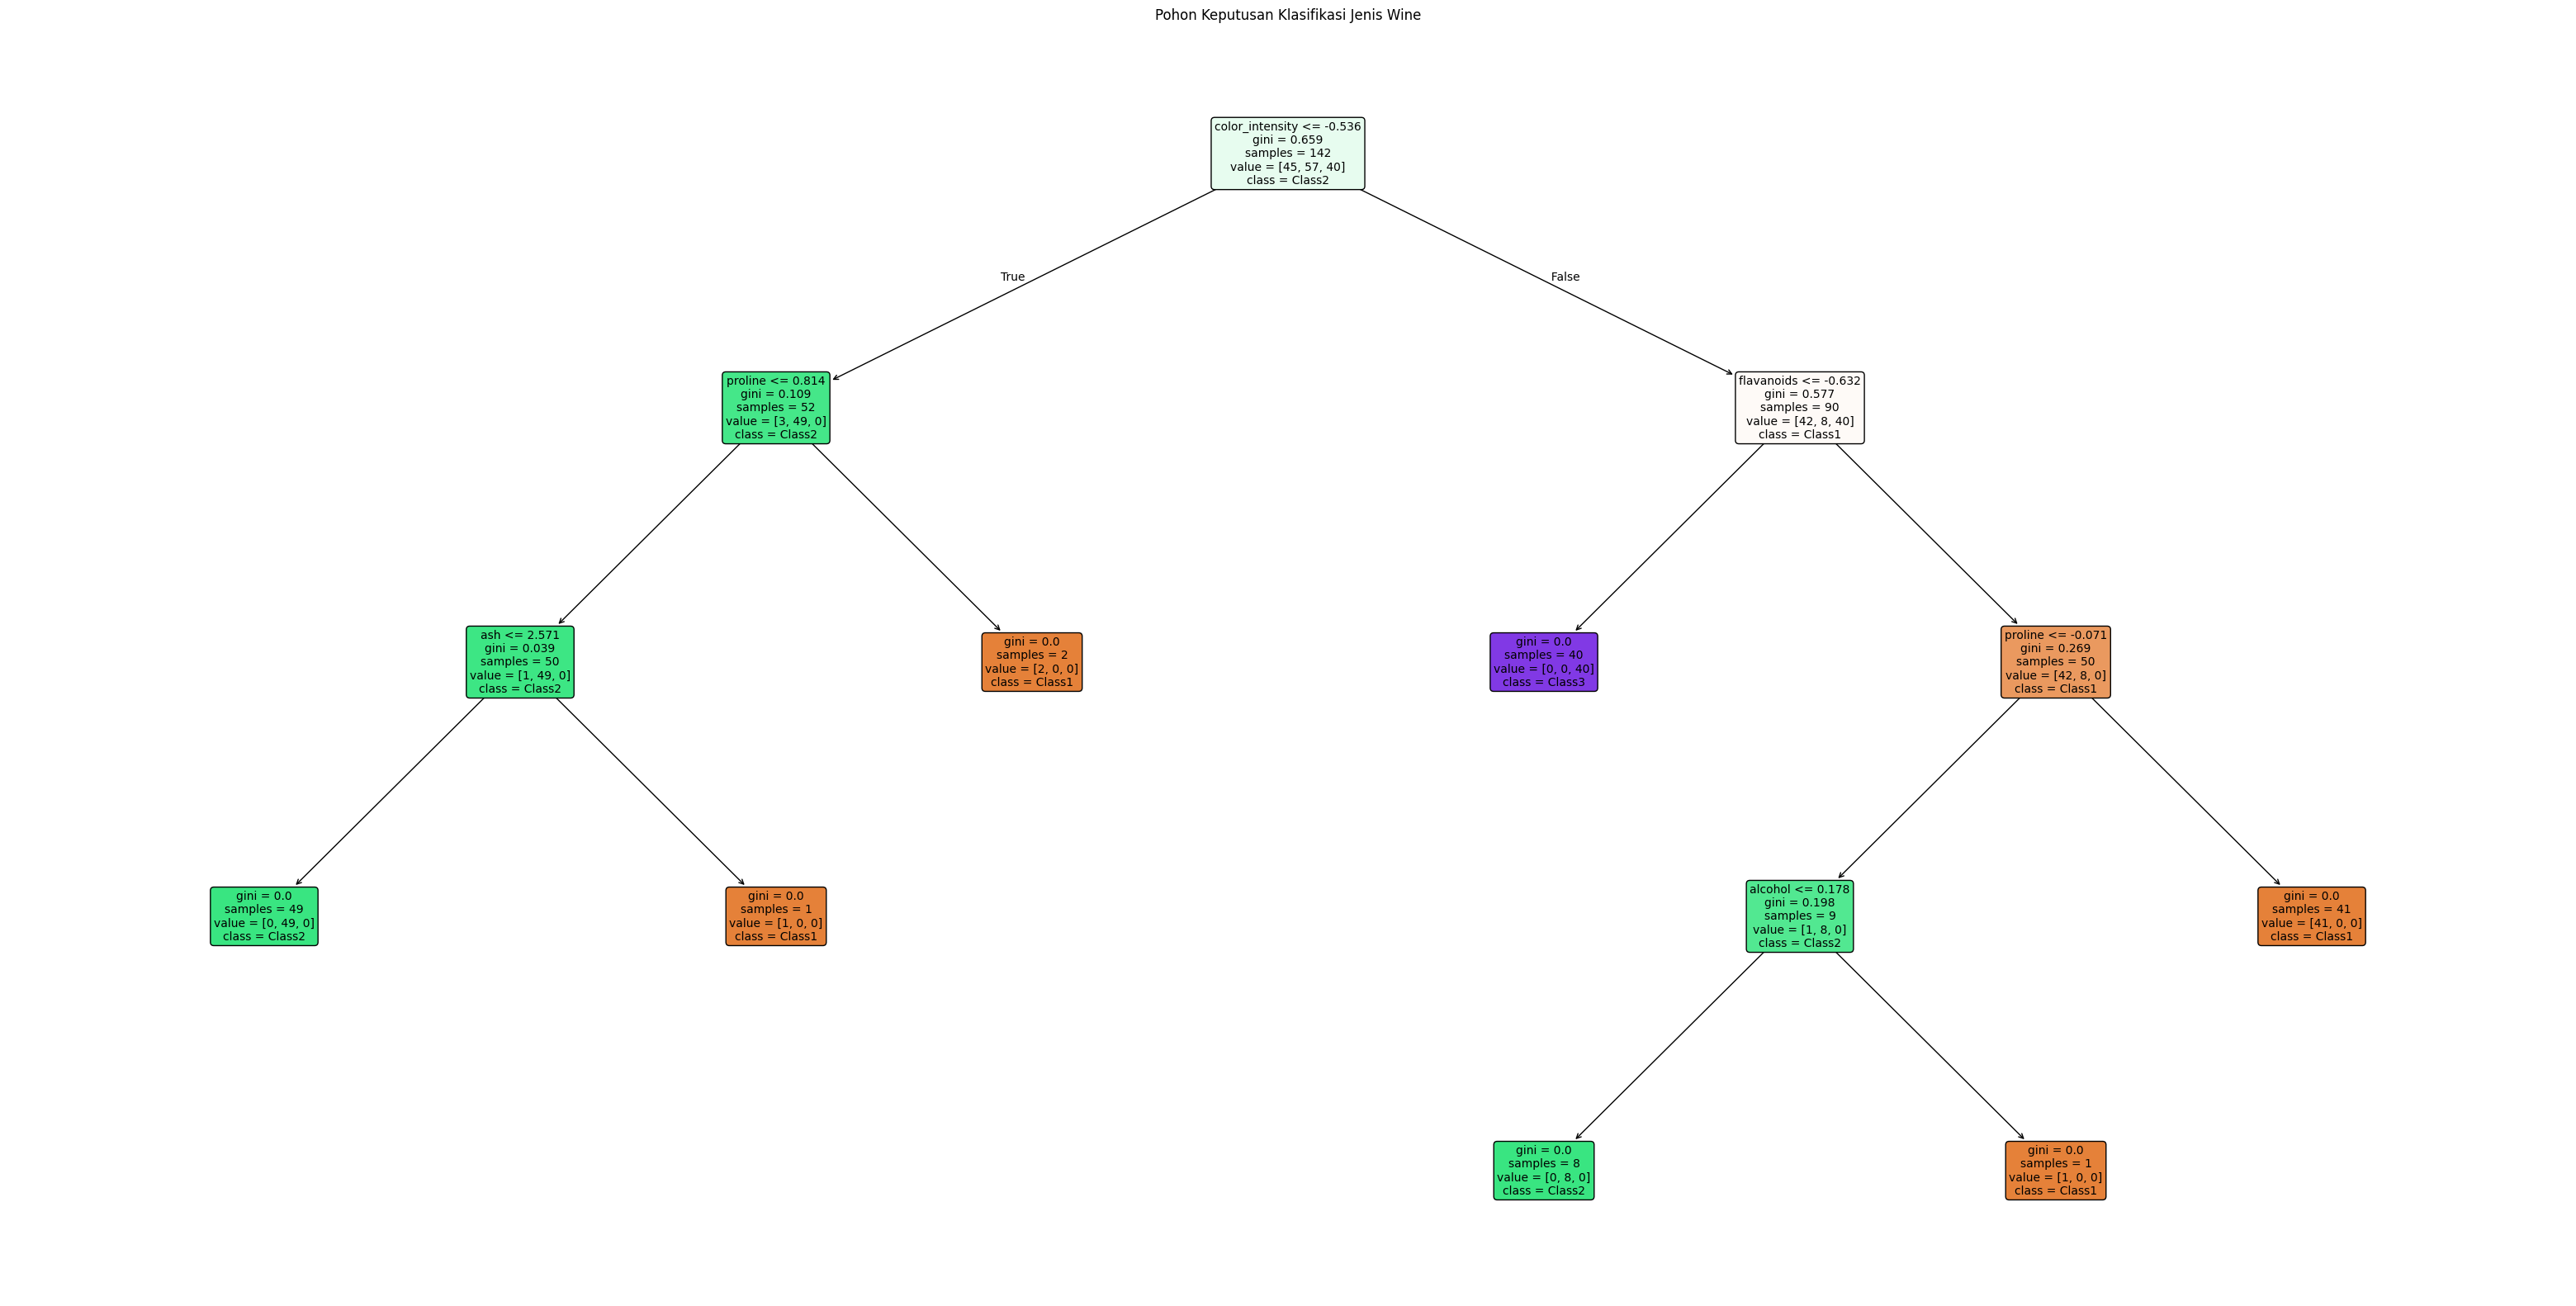

In [29]:
# 3. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 4. Evaluasi Model
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# 7. Visualisasi Struktur Pohon Keputusan

plt.figure(figsize=(40, 20))

# Pastikan class_names bertipe list of strings
class_names = ['Class1', 'Class2', 'Class3']

plot_tree(
    clf,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Pohon Keputusan Klasifikasi Jenis Wine")
plt.show()


### Modelling Klasifikasi Menggunakan Gaussian Naive Bayes
Gaussian Naive Bayes (GNB) adalah algoritma klasifikasi yang digunakan dalam machine learning untuk memprediksi kelas dari suatu data berdasarkan fitur-fitur numerik. GNB merupakan varian dari algoritma Naive Bayes yang mengasumsikan bahwa fitur-fitur memiliki distribusi normal (Gaussian).


Pada pemodelan kali ini, tujuan utama adalah untuk mengklasifikasikan jenis wine berdasarkan kandungan kimia yang diukur dari setiap sampel, seperti kadar alkohol, magnesium, flavonoid, dan lain sebagainya. Dataset wine ini terdiri dari tiga kelas yang merepresentasikan jenis wine: Class1, Class2, dan Class3.

**Langkah-langkah modelling:**

1. **Pembagian dataset : data training dan data testing**

  Langkah awal dalam proses pemodelan adalah membagi dataset menjadi dua bagian:

  Data Latih (Training set) digunakan untuk melatih model Gaussian Naive Bayes.

  Data Uji (Testing set) digunakan untuk mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

  Dalam eksperimen ini, digunakan rasio 80% data training dan 20% data testing.


2. **Menghitung probabilitas awal (prior probability)**

  Selanjutnya hitung probabilitas awal (prior) untuk masing-masing kelas.

  * Hitung jumlah data latih untuk setiap kelas (Class1, Class2, Class3).
  * Bagi dengan total jumlah data latih.
  Nilai ini menunjukkan seberapa besar kemungkinan anggur termasuk ke dalam kelas tersebut tanpa melihat fitur apapun.

3. **Menghitung rata-rata dan standar deviasi tiap fitur**

  Setelah prior diketahui, untuk setiap kelas (Class1, Class2, Class3), model menghitung:

  * Rata-rata (mean) untuk masing-masing fitur numerik seperti alcohol, flavanoids, proline, dll.

  * Standar deviasi (standard deviation) dari setiap fitur pada kelas tersebut.

4. **Menghitung distribusi gaussian**

  Distribusi ini digunakan untuk menghitung seberapa besar kemungkinan nilai fitur tersebut muncul dalam sebuah kelas.

  Nantinya setiap nilai fitur dimasukkan ke dalam rumus distribusi Gaussian di bawah ini:

  $$
  P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
  $$

  dimana:

  * $x$: nilai fitur input
  * $\mu$: rata-rata fitur pada kelas tertentu
  * $\sigma$: standar deviasi fitur pada kelas tertentu

5. **Menghitung posterior probability**

  Dengan mengalikan semua hasil distribusi Gaussian dan dikalikan dengan prior dari kelas, diperoleh nilai posterior probability untuk masing-masing kelas:

  $$
  \text{Posterior} = P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
  $$

  dimana:

  * $P(x_k|C_i)$: hasil distribusi Gaussian dari fitur ke-k pada kelas $C_i$
  * $P(C_i)$: prior probability dari kelas $C_i$

  Model kemudian akan memilih kelas dengan nilai posterior tertinggi sebagai prediksi akhir.

Akurasi: 1.0

=== Classification Report ===
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        14
      Class2       1.00      1.00      1.00        14
      Class3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



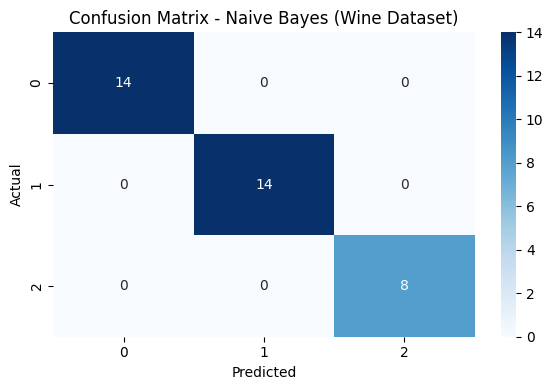

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Latih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluasi hasil prediksi
y_pred = gnb.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Wine Dataset)")
plt.tight_layout()
plt.show()

### Modelling Klasifikasi Menggunakan K-Nearest Neighbor (K-NN)

Model K-Nearest Neighbors (KNN) digunakan dalam pemodelan ini untuk memprediksi jenis/kategori wine berdasarkan berbagai kandungan kimiawi dalam sampel, seperti kadar alkohol, magnesium, flavonoid, dan parameter lainnya.

KNN adalah metode pembelajaran berbasis instance (instance-based learning) yang tidak membentuk model eksplisit. Prediksi dilakukan dengan melihat “tetangga” terdekat dari data yang ingin diklasifikasikan di ruang fitur.



**Langkah-langkah modelling:**

1. **Pembagian dataset: training dan testing**

  Langkah awal dalam proses pemodelan adalah membagi dataset menjadi dua bagian:

  * Data Latih (Training set) digunakan sebagai referensi (tetangga-tetangga) untuk klasifikasi.

  * Data Uji (Testing set) igunakan untuk menguji performa model terhadap data baru.

  Dalam eksperimen ini, digunakan rasio 80% data training dan 20% data testing.

2. **Pra-pemrosesan data**

  Agar algoritma KNN bekerja secara optimal, dilakukan beberapa tahapan pra-pemrosesan:

  1. Encoding Label Kelas (Target):

  * Label kelas (target) pada dataset Wine berupa angka 0, 1, dan 2, yang mewakili tiga jenis wine: Class1, Class2, dan Class3.

  * Label ini dapat dikonversi ke bentuk string untuk interpretasi, lalu dikembalikan ke bentuk numerik untuk proses pemodelan.

  2. Scaling / Normalisasi:

  * Fitur numerik seperti alcohol, flavanoids, proline, dan lain-lain memiliki skala yang berbeda-beda.

  * Karena KNN sangat sensitif terhadap skala fitur, maka digunakan StandardScaler untuk menstandarkan data agar setiap fitur memiliki distribusi seragam (mean = 0 dan std = 1).


3. **Konsep kerja knn**

  Tidak seperti model prediktif berbasis fungsi, KNN hanya menyimpan data latih dan membuat keputusan berdasarkan jarak:

  1. Hitung jarak (biasanya Euclidean) dari data uji ke seluruh data latih.

  2. Ambil k tetangga terdekat berdasarkan jarak tersebut.

  3. Lakukan voting mayoritas: kelas yang paling sering muncul di antara tetangga tersebut menjadi prediksi.

    Contoh:

    Jika k = 5 dan 3 dari 5 tetangga terdekat merupakan Class1, maka prediksi untuk data tersebut adalah Class1.

4. **Evaluasi model**

  Untuk mengukur performa model KNN, dilakukan evaluasi menggunakan:

  Akurasi: rasio jumlah prediksi benar terhadap total prediksi.

  Classification Report: mencakup metrik precision, recall, dan F1-score untuk setiap kelas.

  Confusion Matrix: menunjukkan detail jumlah prediksi benar dan salah dari masing-masing kelas.

  Eksperimen juga dapat dilakukan dengan berbagai nilai k (misalnya 3, 5, 7) untuk mencari parameter k terbaik yang menghasilkan akurasi maksimal.


Akurasi: 0.9444444444444444

=== Classification Report ===
              precision    recall  f1-score   support

      Class1       0.93      1.00      0.97        14
      Class2       1.00      0.86      0.92        14
      Class3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



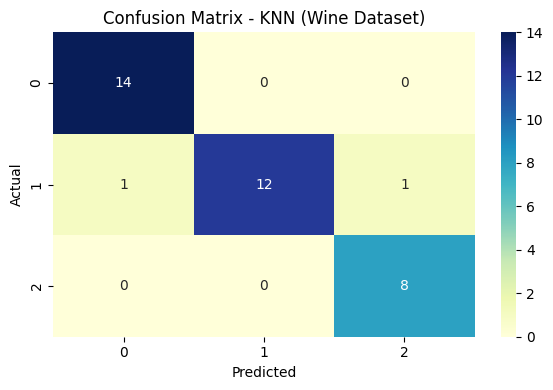

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluasi model
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap='YlGnBu'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Wine Dataset)")
plt.tight_layout()
plt.show()

## Evaluasi Data

Dari hasil evaluasi yang telah dilakukan terhadap tiga model klasifikasi pada dataset Wine, diperoleh akurasi sebagai berikut:

Decision Tree = 94,44%

Gaussian Naive Bayes = 100,00%

K-Nearest Neighbor (KNN) = 94,44%

Berdasarkan nilai akurasi tersebut dapat disimpulkan bahwa Gaussian Naive Bayes menunjukkan performa paling stabil dan akurat pada semua metrik.

Decision Tree dan KNN memiliki performa hampir setara dari sisi akurasi, namun keduanya menunjukkan perbedaan kecil dalam mengenali Class2 dan Class3.

